# Árboles de decisión y bosques

In [19]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Ahora vamos a ver una serie de modelos basados en árboles de decisión. Los árboles de decisión son modelos muy intuitivos. Codifican una serie de decisiones del tipo "SI" "ENTONCES", de forma similar a cómo las personas tomamos decisiones. Sin embargo, qué pregunta hacer y cómo proceder a cada respuesta es lo que aprenden a partir de los datos.

Por ejemplo, si quisiéramos crear una guía para identificar un animal que encontramos en la naturaleza, podríamos hacer una serie de preguntas:

- ¿El animal mide más o menos de un metro?
    - *más*: ¿Tiene cuernos?
      - *Sí*: ¿Son más largos de 10cm?
      - *No*: ¿Tiene collar?
    - *menos*: ¿Tiene dos piernas o cuatro?
        - *Dos*: ¿Tiene alas?
        - *Cuatro*: ¿Tiene una cola frondosa?

Y así... Esta forma de hacer particiones binarias en base a preguntas es la esencia de los árboles de decisión.

Una de las ventajas más importantes de los modelos basados en árboles es que requieren poco procesamiento de los datos.
Pueden trabajar con variables de distintos tipos (continuas y discretas) y no les afecta la escala de las variables.

Otro beneficio es que los modelos basados en árboles son "no paramétricos", lo que significa que no tienen un conjunto fijo de parámetros a aprender. En su lugar, un modelo de árbol puede ser más y más flexible, si le proporcionamos más datos. En otras palabras, el número de parámetros libres aumenta según aumentan los datos disponibles y no es un valor fijo, como pasa en los modelos lineales.

## Regresión con árboles de decisión

Un árbol de decisión funciona de una forma más o menos similar a los predictores basados en el vecino más cercano. Se utiliza de la siguiente forma:

<IPython.core.display.Javascript object>


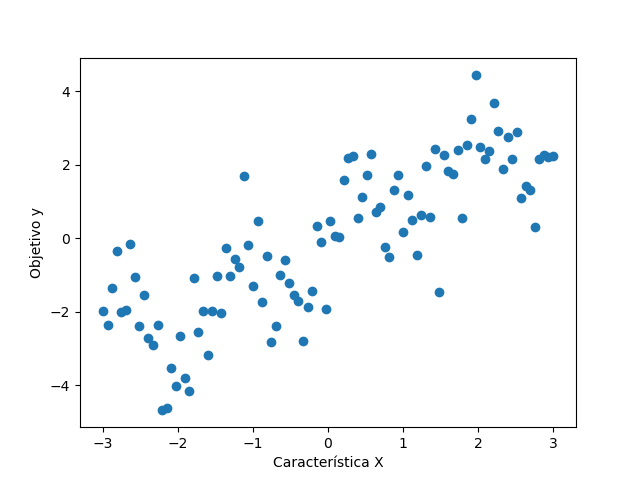

In [20]:
from figures import make_dataset
x, y = make_dataset()
X = x.reshape(-1, 1)

plt.figure()
plt.xlabel('Característica X')
plt.ylabel('Objetivo y')
plt.scatter(X, y);

<IPython.core.display.Javascript object>


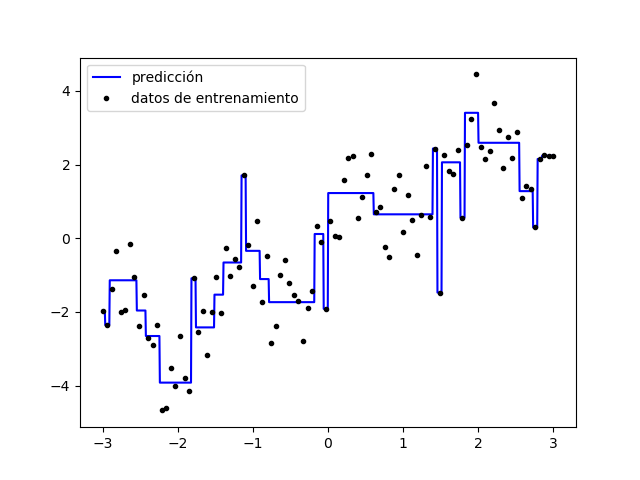

In [21]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=5)
reg.fit(X, y)

X_fit = np.linspace(-3, 3, 1000).reshape((-1, 1))
y_fit_1 = reg.predict(X_fit)

plt.figure()
plt.plot(X_fit.ravel(), y_fit_1, color='blue', label="predicción")
plt.plot(X.ravel(), y, '.k', label="datos de entrenamiento")
plt.legend(loc="best");

Un único árbol de decisión nos permite estimar la señal de una forma no paraḿetrica, pero está claro que tiene algunos problemas. En algunas regiones, el modelo muestra un alto sesgo e infra-aprende los datos (observa las regiones planas, donde no predecimos correctamente los datos), mientras que en otras el modelo muestra varianza muy alta y sobre aprende los datos (observa los picos pequeños de la superficie obtenida, guiados por puntos de entrenamiento "ruidosos").

Clasificación con árboles de decisión
==================
Los árboles de decisión para clasificación actúan de una forma muy similar, asignando todos los ejemplos de una hoja a la etiqueta mayoritaria en esa hoja:


<IPython.core.display.Javascript object>


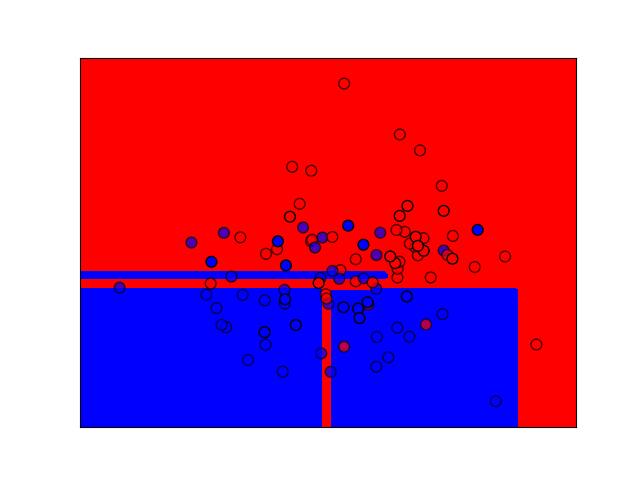

In [22]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from figures import plot_2d_separator


X, y = make_blobs(centers=[[0, 0], [1, 1]], random_state=61526, n_samples=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

plt.figure()
plot_2d_separator(clf, X, fill=True)
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['b', 'r'])[y_train], s=60, alpha=.7, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=np.array(['b', 'r'])[y_test], s=60, edgecolor='k');

Hay varios parámetros que controla la complejidad de un árbol, pero uno que es bastante fácil de entender es la máxima profundidad. Esto limita hasta que nivel se puede afinar particionando el espacio, o, lo que es lo mismo, cuantas reglas del tipo "Si-Entonces" podemos preguntar antes de decidir la clase de un patrón.

Es importante ajustar este parámetro de la mejor forma posible para árboles y modelos basados en árboles. El gráfico interactivo que encontramos a continuación muestra como se produce infra-ajuste y sobre-ajuste para este modelo. Tener un ``max_depth=1`` es claramente un caso de infra-ajuste, mientras que profundidades de 7 u 8 claramente sobre-ajustan. La máxima profundidad para un árbol en este dataset es 8, ya que, a partir de ahí, todas las ramas tienen ejemplos de un única clase. Es decir, todas las ramas son **puras**.

En el gráfico interactivo, las regiones a las que se les asignan colores azules o rojos indican que la clase predicha para ese región es una o la otra. El grado del color indica la probabilidad para esa clase (más oscuro, mayor probabilidad), mientras que las regiones amarillas tienen la misma probabilidad para las dos clases. Las probabilidades se asocian a la cantidad de ejemplos que hay de cada clase en la región evaluada.

In [23]:
# %matplotlib inline
from figures import plot_tree_interactive
plot_tree_interactive()

interactive(children=(IntSlider(value=0, description='max_depth', max=8), Output()), _dom_classes=('widget-int…

Los árboles de decisión son rápidos de entrenar, fáciles de entender y suele llevar a modelos interpretables. Sin embargo, un solo árbol de decisión a veces tiende al sobre-aprendizaje. Jugando con el gráfico anterior, puedes ver como el modelo empieza a sobre-entrenar antes incluso de que consiga una buena separación de los datos.

Por tanto, en la práctica, es más común combinar varios árboles para producir modelos que generalizan mejor. El método más común es el uso de bosques aleatorios y *gradient boosted trees*.

## Bosques aleatorios

Los bosques aleatorios son simplemente conjuntos de varios árboles, que han sido construidos usando subconjuntos aleatorios diferentes de los datos (muestreados con reemplazamiento) y subconjuntos aleatorios distintos de características (sin reemplazamiento). Esto hace que los árboles sean distintos entre si, y que cada uno aprenda aspectos distintos de los datos. Al final, las predicciones se promedian, llegando a una predicción suavizada que tiende a sobre-entrenar menos.

In [24]:
from figures import plot_forest_interactive
plot_forest_interactive()

interactive(children=(IntSlider(value=0, description='max_depth', max=8), Output()), _dom_classes=('widget-int…

## Elegir el estimador óptimo usando validación cruzada

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(n_estimators=200)
parameters = {'max_features':['sqrt', 'log2', 10],
              'max_depth':[5, 7, 9]}

clf_grid = GridSearchCV(rf, parameters, n_jobs=-1)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False,
                                              ra

In [26]:
clf_grid.score(X_train, y_train)

1.0

In [27]:
clf_grid.score(X_test, y_test)

0.9711111111111111

In [28]:
clf_grid.best_params_

{'max_depth': 9, 'max_features': 'log2'}

## Gradient Boosting

Otro método útil tipo *ensemble* es el *Boosting*. En lugar de utilizar digamos 200 estimadores en paralelo, construimos uno por uno los 200 estimadores, de forma que cada uno refina los resultados del anterior. La idea es que aplicando un conjunto de modelos muy simples, se obtiene al final un modelo final mejor que los modelos individuales.

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=.2)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9974946138581186
0.8542334429978936


<div class="alert alert-success">
    <b>Ejercicio: Validación cruzada para Gradient Boosting</b>:
     <ul>
      <li>
      Utiliza una búsqueda *grid* para optimizar los parámetros `learning_rate` y `max_depth` de un *Gradient Boosted
Decision tree* para el dataset de los dígitos manuscritos.
      </li>
    </ul>
</div>

In [30]:
from sklearn.datasets import load_digits
from sklearn.ensemble import GradientBoostingClassifier

digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# divide el dataset y aplica búsqueda grid
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_digits, y_digits, random_state=42)

clf = GradientBoostingRegressor(n_estimators=100)

params = {'learning_rate': [0.01, 0.1, 0.2, 0.5], 'max_depth': [1, 2, 5, 7, 10]}

grid = GridSearchCV(clf, param_grid=params, cv=5)
grid.fit(X_train2, y_train2)
grid.best_params_


{'learning_rate': 0.2, 'max_depth': 5}

In [31]:
print(grid.score(X_train2, y_train2))
print(grid.score(X_test2, y_test2))

0.9975520554767698
0.8594262643060993


## Importancia de las características

Las clases ``RandomForest`` y ``GradientBoosting`` tienen un atributo `feature_importances_` una vez que han sido entrenados. Este atributo es muy importante e interesante. Básicamente, cuantifica la contribución de cada característica al rendimiento del árbol.

In [32]:
X, y = X_digits[y_digits < 2], y_digits[y_digits < 2]

rf = RandomForestClassifier(n_estimators=300, n_jobs=1)
rf.fit(X, y)
print(rf.feature_importances_)  # un valor por característica

[0.00000000e+00 2.47839152e-05 4.87560824e-04 9.34908226e-03
 3.99355241e-04 5.63299342e-03 2.06953895e-03 0.00000000e+00
 0.00000000e+00 1.53912486e-04 2.82842258e-02 9.93287565e-04
 4.17201575e-04 4.75412844e-03 6.38991594e-04 0.00000000e+00
 4.25291714e-05 6.94206120e-03 4.21865140e-03 2.80049249e-02
 7.06281615e-02 3.22965497e-03 1.37371571e-02 0.00000000e+00
 1.81236107e-04 4.42828829e-03 7.80977219e-04 6.61045616e-02
 1.37708869e-01 5.28957279e-03 8.08473386e-02 0.00000000e+00
 0.00000000e+00 1.52721368e-02 1.10507863e-02 5.81140358e-02
 1.50472114e-01 2.18072771e-03 1.04203355e-01 0.00000000e+00
 0.00000000e+00 1.42546575e-02 1.73367364e-02 6.09353329e-03
 6.40425507e-02 3.43390573e-03 2.87187424e-02 0.00000000e+00
 0.00000000e+00 1.51058382e-04 2.72365622e-02 3.97308149e-03
 7.18589589e-04 1.30961775e-03 2.27461580e-04 2.05039176e-04
 0.00000000e+00 0.00000000e+00 1.17824565e-03 8.84336111e-03
 3.98462099e-04 2.09008439e-03 2.35914609e-03 7.86963113e-04]


<IPython.core.display.Javascript object>


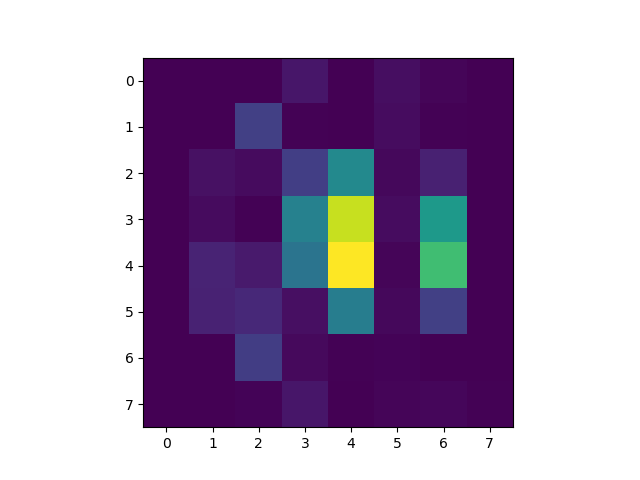

In [33]:
plt.figure()
plt.imshow(rf.feature_importances_.reshape(8, 8), cmap=plt.cm.viridis, interpolation='nearest')